# Jupyter notebook

This is a jupyter notebook.  It is made up of cells which display either text or run functions written in the programming language, python.  You can alter the input to these functions and then re-run the function to see how your input affects the output.

Use the notebook to study the effect on radiographs of changes in exposure settings.  The functions in this notebook predict how the x-ray spectrum of an x-ray tube and the radiographic images that it produces, alter with changes in exposure settings. 

To run a function in a cell you should select the cell by a mouse click in the cell and either press the "ctrl" and "enter" (runs the function and keeps the current cell active), or "shift" and "enter" (runs the function and makes the next cell active).

The cell containing the command "run ./scripts/startup.py" should be run initially as it loads necessary functions for the remainder of the cells. Depending on computer specification, that initial run may take up to a minute to complete.

The notebook runs in a web-page. It has multiple menu options.

You should go through the content cell by cell, reading some cells, while in others inputting parameters.  You can change the input of existing cells or add a blank cell and copy functions from a previous cell. This will allow you to see the output from multiple different inputs.

At the end of this exercise you should understand how changes in exposure setting affect:

<ul>
<li>the x-ray beam</li>
<li>tissue contrast</li>
<li>random noise in radiographic images</li>
</ul>

# Exposure Settings in Radiography

An understanding of radiographic exposure settings gives insight into how image contrast and signal to noise ratio can be optimized, and why noise due to "quantum mottle" is present in the image.

Image contrast in radiographs refers to a difference in gray level between organs or tissues. The basis of the imaging system is that a regions of interest, an organ or a lesion of interest will contrast with, i.e. have a different shade of gray in the image, to surrounding tissue.  If there was no such difference the organ or lesion would not be visible.

In [1]:
run ./scripts/setup.py

Completed






Exposure settings in radiography are usually defined by three parameters. These are:
<ul>
<li>time (s)</li>
<li>tube current in milli Ampers (mA))</li>
<li>peak tube voltage in kilovolts, (kVp)).</li> 
</ul>

These parameters describe the electrical conditions in the x-ray tube when an exposure is made. The schematic diagram of an x-ray tube shows how these settings are applied. 


<img src="images/x-ray-tube-vector-illustration-radiology-scan-equipment-structural-scheme-healthcare-method-transparent-body-luggage-ct-168832490.jpg" alt="x- ray tube"  width="500" height="600"> 

A change in the mA setting for an exposure will change the current flowing through the filament (labeled hot cathode filament in the diagram). Increases or decreases in the filament temperature increase and decrease filament current. Current in the fillament causes it to become heated.  This in turn creates a cloud of electrons  around the cathode. The higher the filament temperature the greater the size of the electron. Increasing the size of the electron cloud increases the overall tube current (electrical current passing from cathode to anode) when the exposure switch is closed. Adjusting the kVp changes the electrical potential difference across the x-ray tube (i.e. between the cathode and anode). Changes in mA and in exposure time (s) only affect the number of x-ray photons in the beam (quantitative effect). Changes in kVp affect both the number and energy of the x-ray photons emitted, (quantitative and qualitative effects).


The spectrum of x-ray photons emitted from an x-ray tube can be plotted to show beam intensity (number of x-ray photons) at various photon energies (in keV). The electron-volt (eV) is a unit of energy.

<img src="images/spectrum_100.png" alt="x- ray tube"  width="700" height="600"> 

The plot above models the spectrum emitted from an x-ray tube operating at 100 kVp.  

Note:

<ul>
<li>many x-ray photon energies are present i.e. the beam is polychromatic </li>
<li>there is a discrete maximum photon energy (upper threshold here is 100 keV)</li>
<li>there is a lower threshold (less well defined but about 15 keV)</li> 
<li>the majority of x-ray photons present have energies between these extremes.</li>
</ul>

The photons present in the spectrum result from two discrete processes. The principal process is "breaking radiation" produced in the anode target (<i>Bremsstrahlung</i>).  This is responsible for the bulk of the x-ray photons in the beam; these are described by the smooth part of the curve.  The other process is "characteristic radiation", it contributes to the focal peaks in the curve at very specific photon energies.  The energy level of these peaks is completely determined by the composition of the anode material.  The peaks show the characteristic radiation of the anode material (Tungsten) and their energy level is a function of the anode material present.  

The cell below contains a function "plot_spectra()". It takes one input.  Use it to generate spectra of x-ray beams produced at a selection of kVp settings in the range 40 to 120 kVp. To generate for example, the spectrum for a <b>40</b> kVp exposure insert <b>40</b> as input to the function, i.e.  "plot_spectra(<b>40</b>)".  For an <b>80</b> kVp exposure, run  "plot_spectra(<b>80</b>)".

As you plot these spectra note how the kVp setting affect:

<ul>
    <li>the area under the spectral curve</li>
    <li>the shape of the curve</li>
    <li>the maximum and minimum beam energy</li>
</ul>
     



In [ ]:

plot_spectra(100)


## Interaction of the x-ray beam with tissues and organs

When a radiographic exposure is made, x-ray photons from the beam interact with the patient.  The organs and tissues within the patient stop some of these photons.  They attenuate the beam.  This property of tissue and organs to attenuate the x-ray beam is described by a parameter called the linear attenuation coefficient, $\mu$ for the tissue.  Each tissue has a different attenuation coefficient. If the difference between two tissues is sufficiently large, the tissues will contrast with each other, i.e. will appear as a difference shade of gray on the radiograph.

The plot below shows the linear attenuation coefficients for liver and adipose tissue for x-ray photons of different energies.  

Note that:

<ul>
    <li>The values are different for the two tissues</li>
    <li>The magnitude of that difference decreases with increasing photon energy</li>
    <li>The values reduce for both tissues as the energy of the photon increases i.e. the tissues become less attenuating</li> 
</ul>


Thus $\mu$ for any given tissue alters with photon energy (keV), it is different for the two tissues shown, and the extent of that difference is a function of photon energy (keV).

<img src="images/tissue_mu.png" alt="x- ray tube"  width="700" height="600"> 



The cell below contains a function called "phantom". It simulates the attenuation of a polychromatic x-ray beam in different tissues at different exposure settings.  It takes two inputs the first corresponds to a chosen mAs setting, the second to a chosen kVp setting.  Thus running the function "phantom(<b>2,65</b>)" simulates the attenuation of an x-ray beam resulting from the exposure settings, <b>2</b> mAs and <b>65</b> kVp.  The function outputs three images, one each for the predicted radiographic appearance of adipose tissue, of liver and of air. Note that in the function each tissue or material is uniform. Each pixel is associated with a linear attenuation coefficient appropriate for the tissue and the photon energy.

Run the code below using a range of inputs to see the effects of different exposure settings.  The function will run faster (as fewer calculations are required) for lower values mAs and kVp.  For speed, choose mAs values between 1 and 3.  You can only choose kVp values in the range 40 to 120 kVp. High values of mAs and kVp will cause the function to run slowly.

Keeping the mAs at values 1 or 2, and kVp in the range 40 to 90, will illustrate all the learning points of this exercise and allow acceptable execution speed.  You can insert empty cells using the notebook menu, then copy or retype the function "phantom(A,B) where "A" and "B" are numbers of your choice, run the function again and compare with previous outputs.

Look at the outputs you obtain and note that :

<ul>
<li>the sequence from light to dark gray / black is always:  Liver, then Fat, then Air </li>
<li>the difference in grey (the contrast) between the liver and fat increases with lower kVp settigs</li>
<li>the difference in grey (the contrast) between the liver and fat does not alter changes in mAs (provided kVp is kept constant)
<li>gray levels in the different pixels that make up each square are not uniform -- there is some mottling</li>
<li>this mottling gets more severe at lower mAs and kVp  settings</li>
</ul>



The text outputs for the function and the cause of mottling are explained in the section below the next cell. 


3.3198838303475338
working on pixel row 10 out of 10 for image 1 of 3     
working on pixel row 10 out of 10 for image 2 of 3     
working on pixel row 10 out of 10 for image 3 of 3     

Liver; Mean pixel value, 0.2924232170036236
Liver; SNR,  0.8522133384303789 db
Total number of photons reaching detector  970

Fat; Mean pixel value, 0.43949224513098073
Fat; SNR,  1.119385326910004 db
Total number of photons reaching detector  1459

Air; Mean pixel value, 0.9986292590000947
Air; SNR,  3.7709785464345464 db
Total number of photons reaching detector  3315

Fat to liver contrast, 0.17693936576561167


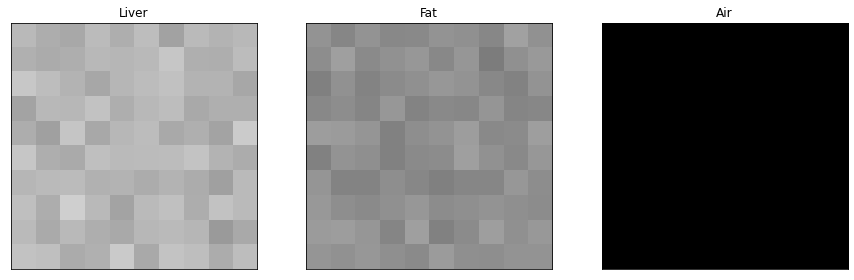

In [2]:
phantom(1,50)

## Mottling, image contrast and signal to noise ratio 

### Mottling

You might be able to explain why uniform material might not appear uniform in the image.  The reason is that the energy of the photons that interact with a specific location in tissue (or phantom) is a matter of statistical chance. The x-ray beam is polychromatic (has photons of multiple energies) and the $\mu$ for a uniform tissue will differ across locations if different locations interact with photons of differing energy.  If the number of photons interacting with each tissue location is low, the chances of overall photon energy differences are high. Remember the photon may come from any region of the spectrum.  If large numbers of photons are used, the statistical chance of an overall difference in the total of photon energies between locations is reduced. The function "phantom" uses a Monte Carlo simulation to model this statistical effect seen in real radiographs.   


### Meaning of the text outputs from the function:
    
    
<b>Mean pixel value:</b> There are 100 (10x10) pixels in each of the three squares.  The mean pixel value is the sum of all pixel values in the square divided by 100.  The greater the value, the darker the shade of gray. This is similar to most radiographic displays, the more photons that strike the detector, the darker the region is displayed.
        
<b>SNR:</b> This stands for signal to noise ratio. Signal gives information about the patient, noise is random variation; its presence makes it harder to detect signal in the image.  Higher values of SNR are better than lower.</b>
            
<b>Fat to liver contrast:</b> This is a measure of the difference as it appears to the human observer between the gray tone of the fat and that of liver.  Higher contrast values between two tissues or between diseased and non-disease regions of tissue make those tissues easier to recognize and disease easier to detect.




The above parameters are calculated by the function as follows:

$$Mean\ pixel\ value = \frac{1}{n}\sum_{i=1}^{n}{v_i} $$

<center>Where $v_i$ is the pixel value of the $i^{\text{th}}$ pixel, n = 100 for this phantom</center>

<br><br>



$$Signal\ to\ noise\ ratio = Log_{10}\ \frac{mean\ of\  pixel\ values}{standard\ deviation\ of\ pixel\ values}$$

<br><br>

$$Fat\ to\ liver\ contrast=Log_{10}\ \frac{mean\ fat\ pixel\ value}{mean\ liver\ pixel\ value} $$

<br><br>
<br style = “line-height:1;”> 

<center>oooooooooooooooooooo000oooooooooooooooooooo</center>

<meta charset="UTF-8">

### Acknowledgments

The x-ray spectra used in this phantom were generated  using the python module "xpecgen"; it was set for a tungsten (W) target, 1.2 mm added Aluminium filtration and a 100 cm air gap. Details of xpecgen module are available at https://github.com/Dih5/xpecgen and in Hernández, G., Fernández F. (2016). A Model of Tungsten X-Ray Anode Spectra. <i>Medical Physics</i>, <b>43</b>, pp 4655-4606. [Link](https://doi.org/10.1118/1.4955120)

<br><br>
The values used for the linear attenuation coefficient ($\mu$) of fat, liver and air were derived from published modeled attenuation data \(Aysun B&ouml;ke. (2014). Linear Attenuation of Tissues from 1 keV to 150 keV, <i>Radiation Physics and Chemistry</i>, <b>102</b>, pp 49-59\. [Link](https://doi.org/10.1016/j.radphyschem.2014.04.006).



